# Домашнее задание "Модели ARMA"

## Задание

1. Выберите ряд из первого задания.
2. Постройте его модель ARIMA.
3. Оформите отчёт в Jupyter-ноутбук.

## Решение

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import boxcox

from statsmodels.tsa.stattools import adfuller
# import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

### 1. Time Series_05 "Monthly Sales of Company X Jan-6"

#### 1.1 Загрузка данных

In [4]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
series.set_index("Month", inplace=True)
series.index = pd.to_datetime(series.index)
series

,Count
Month,
1965-01-01,154
1965-02-01,96
1965-03-01,73
1965-04-01,49
1965-05-01,36
...,...
1971-01-01,628
1971-02-01,308
1971-03-01,324


#### 1.2 Анализ временного ряда

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


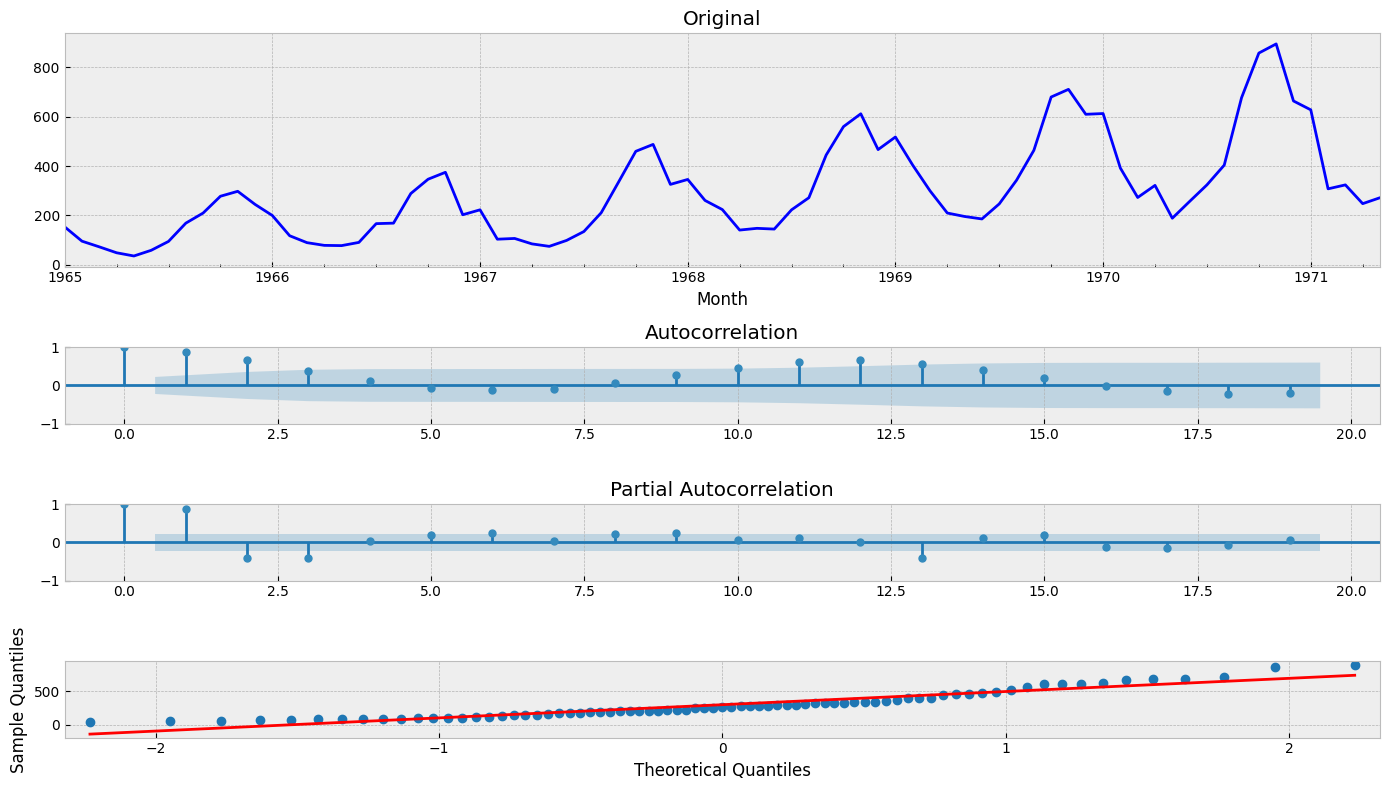

In [5]:
tsplot(series['Count'])

Временной ряд не является стационарным. В нем отмечается тренд, сезонность и разница дисперсий.

#### 1.3 Выравнивание дисперсии

In [6]:
series = boxcox(series['Count'], 0)

### 2. Модель ARMA

#### 2.1 Подбор гиперпараметров

In [24]:
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for j in range(5):
        try:
            tmp_mdl = ARIMA(series, order=(i, 0, j), trend='t').fit()
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/mo

aic: -29.75004 | order: (3, 3)


/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### 2.2 Построение модели

По результатам предыдущего этапа лучшими параметрами являются (p,q) = (3, 3)

In [25]:
arma_model = ARIMA(series, order=(3, 0, 3), trend='t').fit()

/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   77
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  22.875
Date:                Mon, 27 May 2024   AIC                            -29.750
Time:                        17:48:26   BIC                            -11.000
Sample:                             0   HQIC                           -22.250
                                 - 77                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0197      0.004      5.417      0.000       0.013       0.027
ar.L1          2.7248      0.010    276.928      0.000       2.706       2.744
ar.L2         -2.7228      0.013   -215.009      0.0

#### 2.3 Изучим ряд остатков

Results of Dickey-Fuller Test:
Test Statistic                -32.819393
p-value                         0.000000
#Lags Used                      0.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


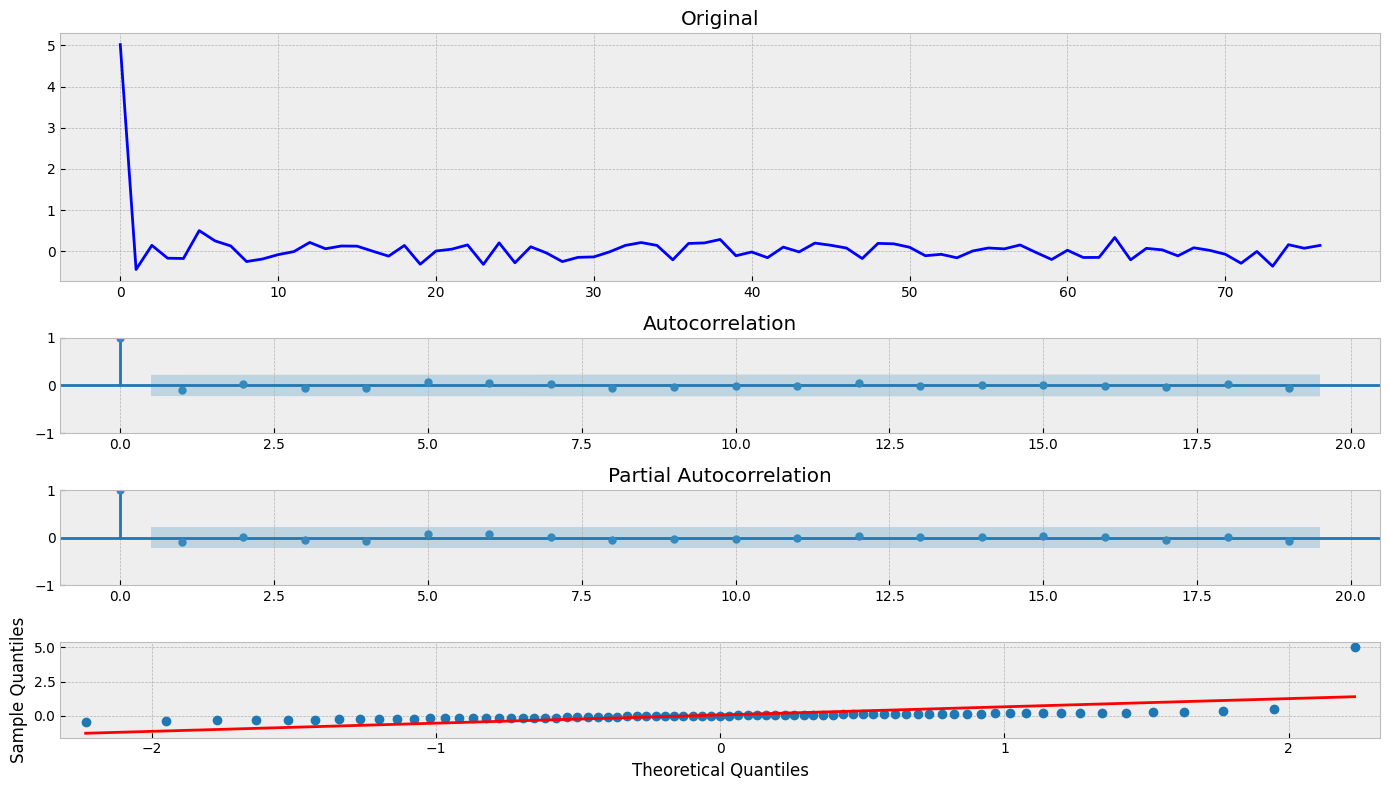

In [27]:
tsplot(arma_model.resid)

Полученный временной ряд практически по всем параметрам является стационарным, хотя отмечается некоторое отклонение значений от прямой на Q-Q-графике. Полученный результат показал хорошее качество модели.

#### 2.4 Прогностические способности ARMA модели

Для этого построим plot_predict на фоне реальных значений и попробуем предсказать 23 новых значений

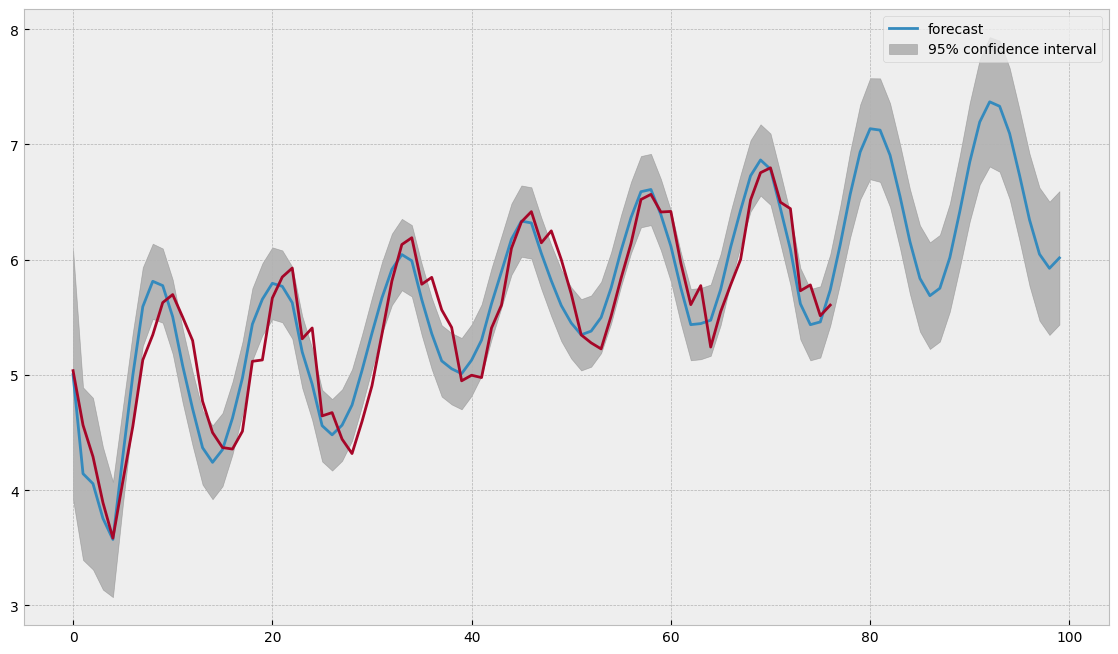

In [31]:
with plt.style.context(style='bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plot_predict(arma_model, start=1, end=100, ax=ax)
    plt.plot(series)

### 3. Модель ARIMA

#### 3.1 Пордбор гиперпараметров

In [34]:
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = ARIMA(series, order=(i,d,j), trend='t').fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWar

aic: -40.80965 | order: (2, 1, 3)


/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### 3.2 Построение модели

In [35]:
arima_model = ARIMA(series, order=(2, 1, 3), trend='t').fit()

/home/andrew/.cache/pypoetry/virtualenvs/ts-studying-gf7ATlvB-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   77
Model:                 ARIMA(2, 1, 3)   Log Likelihood                  27.405
Date:                Mon, 27 May 2024   AIC                            -40.810
Time:                        18:08:47   BIC                            -24.495
Sample:                             0   HQIC                           -34.289
                                 - 77                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0212      0.002     11.305      0.000       0.018       0.025
ar.L1          1.7189      0.015    111.083      0.000       1.689       1.749
ar.L2         -0.9902      0.012    -80.046      0.0

#### 3.3 Изучим ряд остатков

Results of Dickey-Fuller Test:
Test Statistic                -32.816140
p-value                         0.000000
#Lags Used                      0.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


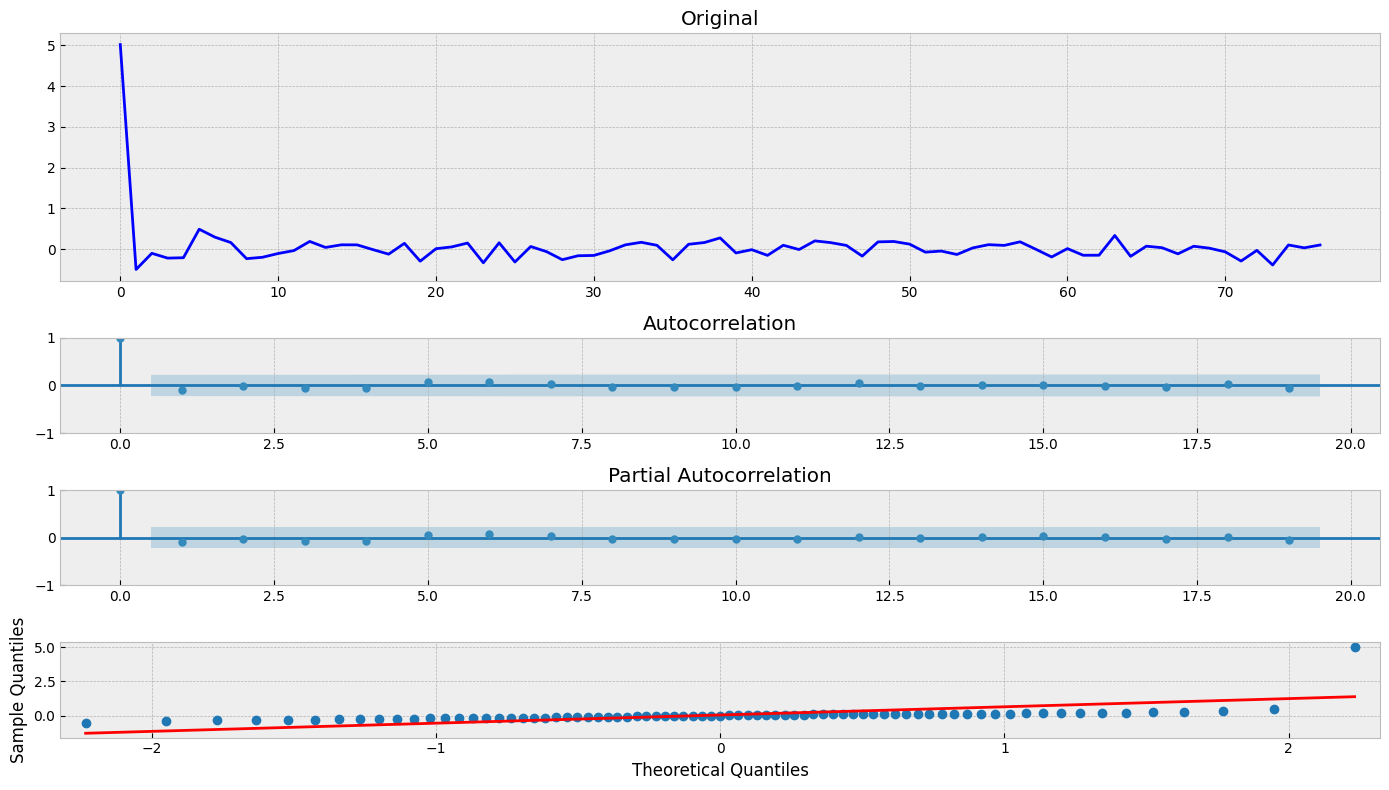

In [37]:
tsplot(arima_model.resid)

#### 3.4 Прогностические способности модели

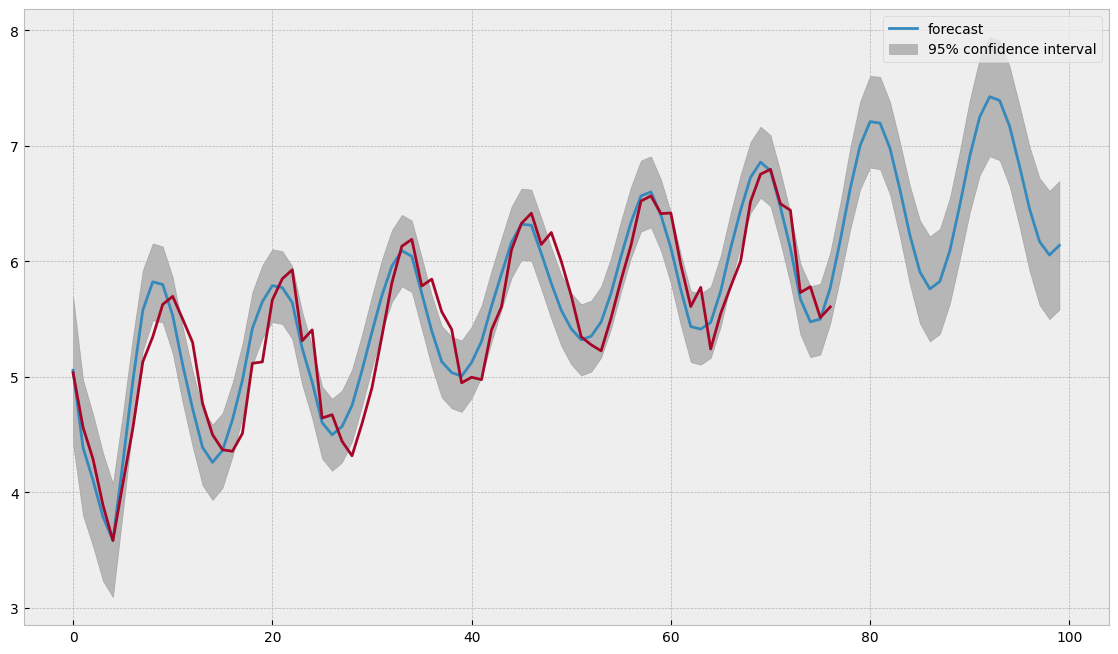

In [39]:
with plt.style.context(style='bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plot_predict(arima_model, start=1, end=100, ax=ax)
    plt.plot(series)

## Дополнительное задание

Попробуйте спрогнозировать график классическим ML

### 4. Модель линейной регрессии

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")

In [134]:
series.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [114]:
series.shape

(77, 2)

In [207]:
n = 12
y = series['Count'][:-n]
X = pd.DataFrame()
s = np.array(series['Count'])
for i in range(1,n):
    x = pd.Series(s[n - i:-i], name=f"{n - i}")
    X = pd.concat([X, x], axis=1)

    
    

In [208]:
X.shape

(65, 11)

In [209]:
X

,11,10,9,8,7,6,5,4,3,2,1
0,245,298,278,210,169,95,59,36,49,73,96
1,200,245,298,278,210,169,95,59,36,49,73
2,118,200,245,298,278,210,169,95,59,36,49
3,90,118,200,245,298,278,210,169,95,59,36
4,79,90,118,200,245,298,278,210,169,95,59
...,...,...,...,...,...,...,...,...,...,...,...
60,664,895,858,677,404,324,257,189,322,273,392
61,628,664,895,858,677,404,324,257,189,322,273
62,308,628,664,895,858,677,404,324,257,189,322
63,324,308,628,664,895,858,677,404,324,257,189


In [210]:
y.shape

(65,)

In [211]:
model = LinearRegression()

In [212]:
model.fit(X, y)

LinearRegression()

In [213]:
y_pred = model.predict(X)

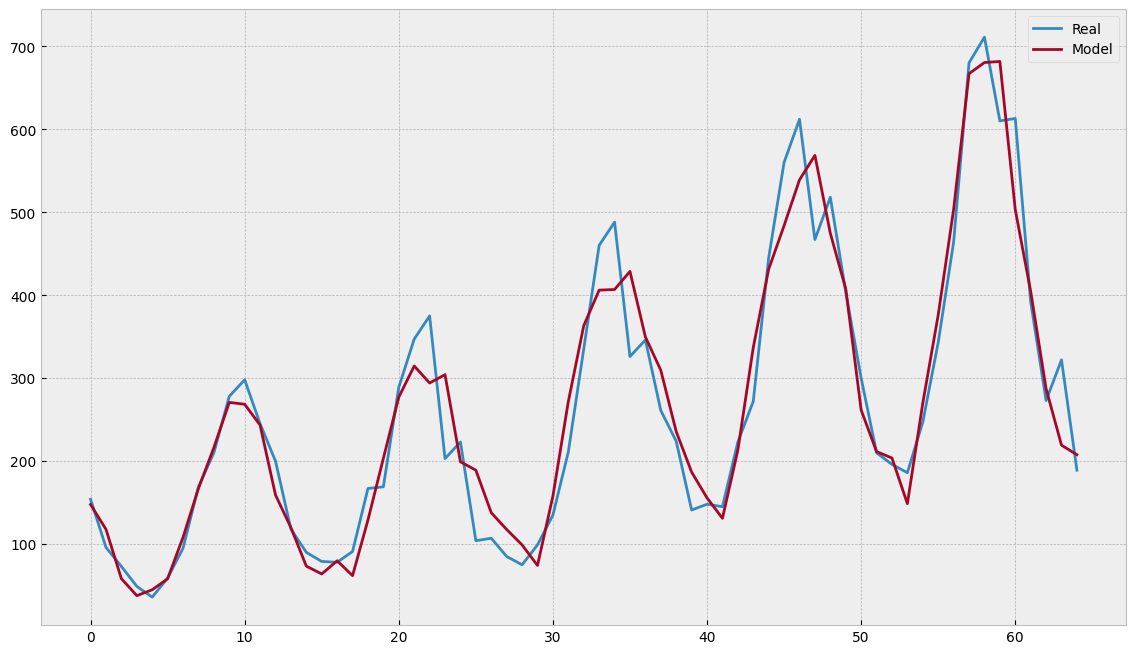

In [214]:
with plt.style.context(style='bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plt.plot(y, label='Real')
    plt.plot(y_pred, label='Model')
    plt.legend()

In [215]:
r2 = model.score(X, y)
r2

0.929303553963838

In [216]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

44.74041194110831

### 5. Полиномиальная регрессия

In [217]:
x = np.array(X['1'])
x = x[:, np.newaxis]
x.shape

(65, 1)

In [218]:
y = np.array(y)
y = y[:, np.newaxis]
y.shape

(65, 1)

In [219]:
polinominal_features = PolynomialFeatures(degree=3)
x_poly = polinominal_features.fit_transform(x)

In [228]:
x_poly[:3]

array([[1.00000e+00, 9.60000e+01, 9.21600e+03, 8.84736e+05],
       [1.00000e+00, 7.30000e+01, 5.32900e+03, 3.89017e+05],
       [1.00000e+00, 4.90000e+01, 2.40100e+03, 1.17649e+05]])

In [220]:
x_poly.shape

(65, 4)

In [221]:
poly_model = LinearRegression()

In [222]:
poly_model.fit(x_poly, y)

LinearRegression()

In [223]:
y_poly_pred = poly_model.predict(x_poly)

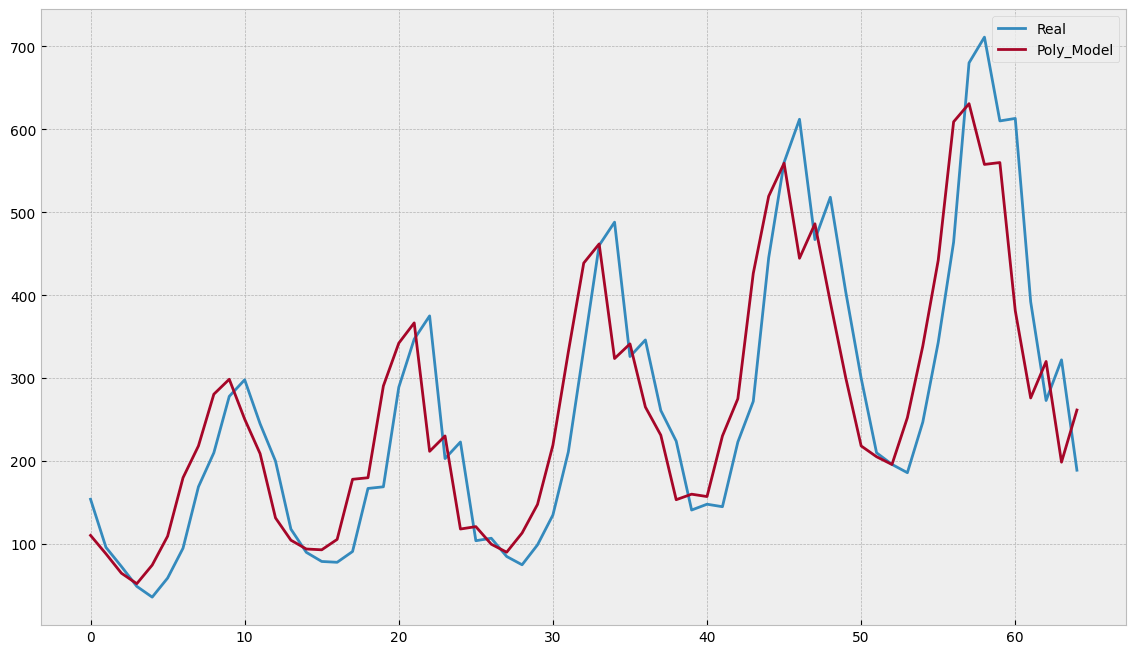

In [224]:
with plt.style.context(style='bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plt.plot(y, label='Real')
    plt.plot(y_poly_pred, label='Poly_Model')
    plt.legend()

In [225]:
r2 = poly_model.score(x_poly, y)
r2

0.7639759787676124

In [226]:
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
rmse

81.74840542845286

## Выводы:

1. Модели ARMA и ARIMA хорошо показали себя в плане прогноза значений временного предложенного временного ряда.
2. Используя в качестве предикторов предыдущие значения, для моделирования временных рядов можно использовать линейную или полиномиальную регрессию. Однако, похоже, что эти модели успешно переобучились.